In [ ]:
#word2vec

In [ ]:
import gensim


In [ ]:
from gensim.models import Word2Vec

In [ ]:
sentences=[['this','is','the','first','sentence','for','word2vec'],['this','is','the','second','sentence'],['yet','another','sentence'],['one','more','sentence'],['and','the','final','sentence']]

In [ ]:


model=Word2Vec(sentences, min_count=1, size=50, window=3,sg=1)
print(model)

Word2Vec(vocab=14, size=50, alpha=0.025)


In [ ]:
words=list(model.wv.vocab)
print(words)

['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


In [ ]:
#access vector for one word

print(model['sentence'])

#save model
model.save('model.bin')   #inside paranthesis path given

[-0.0084707  -0.00131934  0.005895   -0.007475   -0.00161077 -0.00688795
  0.00798559 -0.00066261  0.00536984  0.00539821 -0.00325427  0.00898291
 -0.00184758 -0.00578439 -0.00313248 -0.0074091   0.00544347 -0.00901687
 -0.00421363 -0.00652376  0.00507476  0.00282078 -0.00433587 -0.00534188
  0.0011332  -0.00075126  0.00068287 -0.00644027 -0.00997568 -0.00980463
 -0.00763446 -0.00027056  0.00788652 -0.00424431 -0.00898976 -0.00818105
 -0.001944    0.00316159  0.00530659 -0.00271611 -0.00202065  0.00418205
 -0.00251548  0.00065551 -0.00373622  0.00467388 -0.00972205  0.00881265
 -0.00559941 -0.00404621]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:

#load model

new_model=Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=50, alpha=0.025)


In [ ]:
model.similarity('first','second')
model.most_similar('word2vec')[:2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('yet', 0.31289437413215637), ('the', 0.1282287985086441)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


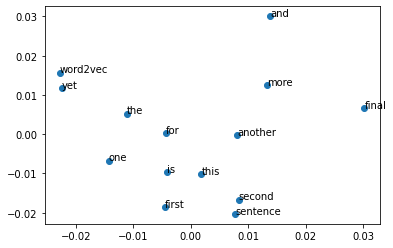

In [ ]:
from sklearn.decomposition import PCA 
from matplotlib import pyplot

#fit a 2d mode to the vectors

x=model[model.wv.vocab]
pca=PCA(n_components=2)
result=pca.fit_transform(x)

#create scatter plot of projection

pyplot.scatter(result[:,0], result[:,1])
words=list(model.wv.vocab)

for i, word in enumerate(words):
  pyplot.annotate(word,xy=(result[i,0],result[i,1]))
pyplot.show()  




























In [ ]:
#pretrained model

In [ ]:
import gensim.downloader as api
word2vec_model=api.load('word2vec-google-news-300')


In [ ]:
word2vec_model["beautiful"]

array([-0.01831055,  0.05566406, -0.01153564,  0.07275391,  0.15136719,
       -0.06176758,  0.20605469, -0.15332031, -0.05908203,  0.22851562,
       -0.06445312, -0.22851562, -0.09472656, -0.03344727,  0.24707031,
        0.05541992, -0.00921631,  0.1328125 , -0.15429688,  0.08105469,
       -0.07373047,  0.24316406,  0.12353516, -0.09277344,  0.08203125,
        0.06494141,  0.15722656,  0.11279297, -0.0612793 , -0.296875  ,
       -0.13378906,  0.234375  ,  0.09765625,  0.17773438,  0.06689453,
       -0.27539062,  0.06445312, -0.13867188, -0.08886719,  0.171875  ,
        0.07861328, -0.10058594,  0.23925781,  0.03808594,  0.18652344,
       -0.11279297,  0.22558594,  0.10986328, -0.11865234,  0.02026367,
        0.11376953,  0.09570312,  0.29492188,  0.08251953, -0.05444336,
       -0.0090332 , -0.0625    , -0.17578125, -0.08154297,  0.01062012,
       -0.04736328, -0.08544922, -0.19042969, -0.30273438,  0.07617188,
        0.125     , -0.05932617,  0.03833008, -0.03564453,  0.24

In [ ]:
word2vec_model.most_similar("girl")

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


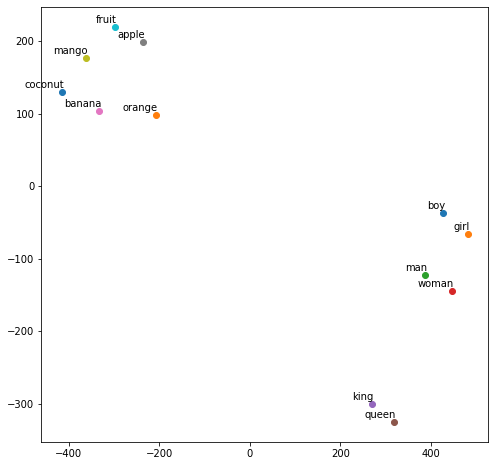

In [ ]:
vocab = ["boy", "girl", "man", "woman", "king", "queen", "banana", "apple", "mango", "fruit", "coconut", "orange"]
vocab2=['vehicle','car','jeep','ship','train','flight','travel','kilometer','distance','crow','hen','eagle','pigeon']
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(word2vec_model)
